In [226]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy as sa
import matplotlib.pyplot as plt
import datetime
import random
import os

In [227]:
server = 'cs-eur-research-dp-olap-synw.sql.azuresynapse.net'
database = 'sqlpool01'
username = 'sqladminuser'
password = 'BeanieBoblets1234'   
driver= '{ODBC Driver 18 for SQL Server}'
port = os.getenv('PORT',default=1433)

In [251]:

connection_url = sa.engine.URL.create(
    "mssql+pyodbc",
    username=username,
    password=password,
    host=server,
    database=database,
    query={
        "driver": "ODBC Driver 18 for SQL Server",
        "autocommit": "True",
    },
)
engine = create_engine(connection_url).execution_options(
    fast_executemany=True
)

In [229]:
cnxn = pyodbc.connect('DRIVER='+driver+';SERVER=tcp:'+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

In [230]:
sql = "SELECT * from AdventureWorks.sales_order_header"
df_soh = pd.read_sql(sql, cnxn)
print(df_soh.columns)
display(df_soh)

Index(['SalesOrderID', 'RevisionNumber', 'OrderDate', 'DueDate', 'ShipDate',
       'Status', 'OnlineOrderFlag', 'SalesOrderNumber', 'PurchaseOrderNumber',
       'AccountNumber', 'CustomerID', 'ShipToAddressID', 'BillToAddressID',
       'ShipMethod', 'CreditCardApprovalCode', 'SubTotal', 'TaxAmt', 'Freight',
       'TotalDue', 'Comment', 'rowguid', 'ModifiedDate', 'OrderYear',
       'OrderMonth'],
      dtype='object')


/root/My Developments/azure-data-platform-demo/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,...,CreditCardApprovalCode,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate,OrderYear,OrderMonth
0,71885,2,2009-03-01 00:00:00.0000000,2008-06-13 00:00:00.0000000,2008-06-08 00:00:00.0000000,5,False,SO71885,PO6119130779,10-4020-000268,...,,550.3860,44.0309,13.7597,608.1766,,caad090d-56a6-444e-af24-7bee7605f120,2008-06-08 00:00:00.0000000,2008,6
1,71867,2,2009-03-01 00:00:00.0000000,2008-06-13 00:00:00.0000000,2008-06-08 00:00:00.0000000,5,False,SO71867,PO13050111529,10-4020-000160,...,,1059.3100,84.7448,26.4828,1170.5376,,29743c1b-d3af-4cfe-bd2e-6de436e3398f,2008-06-08 00:00:00.0000000,2008,6
2,71815,2,2008-11-01 00:00:00.0000000,2008-06-13 00:00:00.0000000,2008-06-08 00:00:00.0000000,5,False,SO71815,PO13021155785,10-4020-000276,...,,1141.5782,91.3263,28.5395,1261.4440,,2aa5f39b-1096-4a4b-b17b-f10504a397ce,2008-06-08 00:00:00.0000000,2008,6
3,71774,2,2008-06-01 00:00:00.0000000,2008-06-13 00:00:00.0000000,2008-06-08 00:00:00.0000000,5,False,SO71774,PO348186287,10-4020-000609,...,,880.3484,70.4279,22.0087,972.7850,Leave with next neighbour,89e42cdc-8506-48a2-b89b-eb3e64e3554e,2022-04-05 15:22:02.6770000,2008,6
4,71899,2,2009-05-01 00:00:00.0000000,2008-06-13 00:00:00.0000000,2008-06-08 00:00:00.0000000,5,False,SO71899,PO4582142611,10-4020-000025,...,,2415.6727,193.2538,60.3918,2669.3183,,31d41e8f-6f43-4cae-bee3-3cccb262f231,2008-06-08 00:00:00.0000000,2008,6
5,71902,2,2009-05-01 00:00:00.0000000,2008-06-13 00:00:00.0000000,2008-06-08 00:00:00.0000000,5,False,SO71902,PO5539125166,10-4020-000061,...,,74058.8078,5924.7046,1851.4702,81834.9826,,137850d6-efdf-4de1-920f-5757a86cdaaf,2008-06-08 00:00:00.0000000,2008,6
6,71782,2,2008-07-01 00:00:00.0000000,2008-06-13 00:00:00.0000000,2008-06-08 00:00:00.0000000,5,False,SO71782,PO19372114749,10-4020-000582,...,,39785.3304,3182.8264,994.6333,43962.7901,,f1be45a5-5c57-4a50-93c6-5f8be44cb7cb,2008-06-08 00:00:00.0000000,2008,6
7,71832,2,2008-12-01 00:00:00.0000000,2008-06-13 00:00:00.0000000,2008-06-08 00:00:00.0000000,5,False,SO71832,PO10353140756,10-4020-000088,...,,35775.2113,2862.0169,894.3803,39531.6085,,addb8620-432a-456e-8470-1bedd4bc3457,2008-06-08 00:00:00.0000000,2008,6
8,71938,2,2009-08-01 00:00:00.0000000,2008-06-13 00:00:00.0000000,2008-06-08 00:00:00.0000000,5,False,SO71938,PO8468183315,10-4020-000016,...,,88812.8625,7105.0290,2220.3216,98138.2131,,a36ee74a-cf0d-4024-a1ce-4eaffd1f85f0,2008-06-08 00:00:00.0000000,2008,6
9,71816,2,2008-11-01 00:00:00.0000000,2008-06-13 00:00:00.0000000,2008-06-08 00:00:00.0000000,5,False,SO71816,PO12992180445,10-4020-000295,...,,3398.1659,271.8533,84.9541,3754.9733,,e3c189e7-98de-4c40-b6c2-0d1d13f9bb33,2008-06-08 00:00:00.0000000,2008,6


In [231]:
sql = "SELECT * from AdventureWorks.sales_order_detail"
df_sod = pd.read_sql(sql, cnxn)
print(df_sod.columns)
display(df_sod)

Index(['SalesOrderID', 'SalesOrderDetailID', 'OrderQty', 'ProductID',
       'UnitPrice', 'UnitPriceDiscount', 'LineTotal', 'rowguid',
       'ModifiedDate'],
      dtype='object')


/root/My Developments/azure-data-platform-demo/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,SalesOrderID,SalesOrderDetailID,OrderQty,ProductID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,ModifiedDate
0,71946,113406,1,916,31.584,0.0,31.5840,b571cee0-a90a-4e76-9796-379b55352a28,2008-06-01 00:00:00.0000000
1,71774,110563,1,822,356.898,0.0,356.8980,5c77f557-fdb6-43ba-90b9-9a7aec55ca32,2008-06-01 00:00:00.0000000
2,71815,111452,2,835,356.898,0.0,713.7960,daeb0cfa-807c-46ac-8458-ffccef36b5b2,2008-06-01 00:00:00.0000000
3,71846,112149,2,936,37.254,0.0,74.5080,7232fd67-8db7-42f8-ad0d-6185299430f1,2008-06-01 00:00:00.0000000
4,71897,112902,4,712,5.394,0.0,21.5760,0a3dff58-2da3-4430-a1d9-b8592db22b5b,2008-06-01 00:00:00.0000000
...,...,...,...,...,...,...,...,...,...
537,71784,110771,7,962,445.410,0.0,3117.8700,99d641dd-76d5-4334-9e55-99ff78125a94,2008-06-01 00:00:00.0000000
538,71780,110618,6,988,112.998,0.4,406.7928,12706fab-f3a2-48c6-b7c7-1ccde4081f18,2008-06-01 00:00:00.0000000
539,71780,110628,1,985,112.998,0.4,67.7988,2c10a282-a13d-442a-8f45-f4d6b23a7d9c,2008-06-01 00:00:00.0000000
540,71784,110794,10,707,20.994,0.0,209.9400,b86d13fa-2545-4e15-9ab5-1162c1374a6c,2008-06-01 00:00:00.0000000


In [232]:
# Get distinct customers
df_customers = df_soh[['AccountNumber', 'CustomerID', 'ShipToAddressID', 'BillToAddressID', 'ShipMethod', 'CreditCardApprovalCode']].copy()
df_customers.drop_duplicates(inplace=True)
display(df_customers)


,AccountNumber,CustomerID,ShipToAddressID,BillToAddressID,ShipMethod,CreditCardApprovalCode
0,10-4020-000268,29612,649,649,CARGO TRANSPORT 5,
1,10-4020-000160,29644,643,643,CARGO TRANSPORT 5,
2,10-4020-000276,30089,1034,1034,CARGO TRANSPORT 5,
3,10-4020-000609,29847,1092,1092,CARGO TRANSPORT 5,
4,10-4020-000025,29568,993,993,CARGO TRANSPORT 5,
5,10-4020-000061,29929,999,999,CARGO TRANSPORT 5,
6,10-4020-000582,29485,1086,1086,CARGO TRANSPORT 5,
7,10-4020-000088,29922,639,639,CARGO TRANSPORT 5,
8,10-4020-000016,29546,635,635,CARGO TRANSPORT 5,
9,10-4020-000295,30027,1038,1038,CARGO TRANSPORT 5,


In [ ]:
# Get distinct products
df_products = df_sod[['ProductID', 'UnitPrice',	'UnitPriceDiscount']].copy()
df_products.drop_duplicates(inplace=True)
display(df_products)

[ 5.18820262  5.31272764  5.47097987  5.70299829  5.92356505  5.98414666
  6.16068428  6.27457333  6.39358825  6.54771199  6.68809779  6.91912298
  7.11016258  7.26101712  7.43846645  7.61205603  7.87802728  8.01942541
  8.20492015  8.29894067  8.25304838  8.4720528   8.71472935  8.82434627
  9.2011242   9.25132869  9.44058854  9.61172905  9.95129022 10.29653617
 10.51842112 10.76856626]


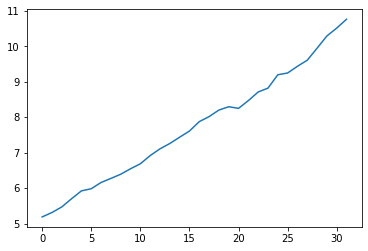

In [233]:
# Create stochastic increasing sales model 
start_date = datetime.date(2010, 1, 1)
end_date = datetime.date(2010, 2, 2)
date_delta = end_date - start_date
date_delta.days

mu = 0.02
sigma = 0.01
start_qty_orders_per_day = 5

np.random.seed(0)
returns = np.random.normal(loc=mu, scale=sigma, size=date_delta.days)
qty_orders_per_day = start_qty_orders_per_day*(1+returns).cumprod()

print(qty_orders_per_day)
plt.plot(qty_orders_per_day)

In [234]:
qty_orders_per_day= [int(qty) for qty in qty_orders_per_day]
print(qty_orders_per_day)

[5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10]


In [235]:
sales_order_id = 0
sales_order_detail_id = 0
revision_number = 2


In [236]:
# Create new enlarged dataframes as copies oof originals but only column/datatype definitions
df_soh_enlarged = df_soh.iloc[:0].copy()
df_sod_enlarged = df_sod.iloc[:0].copy()
print(df_soh_enlarged.columns)
print(df_sod_enlarged.columns)


Index(['SalesOrderID', 'RevisionNumber', 'OrderDate', 'DueDate', 'ShipDate',
       'Status', 'OnlineOrderFlag', 'SalesOrderNumber', 'PurchaseOrderNumber',
       'AccountNumber', 'CustomerID', 'ShipToAddressID', 'BillToAddressID',
       'ShipMethod', 'CreditCardApprovalCode', 'SubTotal', 'TaxAmt', 'Freight',
       'TotalDue', 'Comment', 'rowguid', 'ModifiedDate', 'OrderYear',
       'OrderMonth'],
      dtype='object')
Index(['SalesOrderID', 'SalesOrderDetailID', 'OrderQty', 'ProductID',
       'UnitPrice', 'UnitPriceDiscount', 'LineTotal', 'rowguid',
       'ModifiedDate'],
      dtype='object')


In [237]:



for _, i in enumerate(range(date_delta.days)):
    order_date = start_date + datetime.timedelta(days=i)
    ship_date = start_date + datetime.timedelta(days= i + 1)
    due_date = start_date + datetime.timedelta(days= i + 7)
    order_date_as_timestamp = str(order_date) + ' 00:00:00.0000000'
    ship_date_as_timestamp = str(ship_date) + ' 00:00:00.0000000'
    due_date_as_timestamp = str(due_date) + ' 00:00:00.0000000'
    
    for _, ord in enumerate(range(qty_orders_per_day[i])):
        sales_order_id += 1
        sales_order_number = 'SO' + str(sales_order_id)
        sales_order_sub_total = 0

        number_order_detail_lines = random.randint(1, 5)
        df_random_customer = df_customers.sample(n=1,replace=True)  # Select 1 random customer and allow this customer to be reselected

        for _, det in enumerate(range(number_order_detail_lines)):
            sales_order_detail_id += 1
            df_random_product = df_products.sample(n=1,replace=True)  # Select 1 random product and allow it to be reselected
            product_id = df_random_product['ProductID'].iloc[0]
            unit_price = df_random_product['UnitPrice'].iloc[0]
            unit_price_discount = df_random_product['UnitPriceDiscount'].iloc[0]
            order_qty = random.randint(1, 5)
            line_total = (unit_price - (unit_price * unit_price_discount)) * order_qty
            
            sales_order_sub_total += line_total
            
            new_detail = {'SalesOrderID': sales_order_id, 
                          'SalesOrderDetailID': sales_order_detail_id, 
                          'OrderQty': order_qty, 
                          'ProductID':product_id,
                          'UnitPrice': unit_price,
                          'UnitPriceDiscount': unit_price_discount, 
                          'LineTotal': line_total, 
                          'rowguid': '',
                          'ModifiedDate': order_date}
            
            df_sod_enlarged = df_sod_enlarged.append(new_detail, ignore_index=True)
        
        tax_amount = sales_order_sub_total * 0.079
        freight_amount = sales_order_sub_total * 0.02
        
        new_header = {'SalesOrderID': sales_order_id, 
                      'RevisionNumber': 2, 
                      'OrderDate': order_date_as_timestamp, 
                      'DueDate': due_date_as_timestamp, 
                      'ShipDate': ship_date_as_timestamp,
                      'Status': 5, 
                      'OnlineOrderFlag': 1, 
                      'SalesOrderNumber': sales_order_number, 
                      'PurchaseOrderNumber': "",
                      'AccountNumber': df_random_customer['AccountNumber'].iloc[0], 
                      'CustomerID': df_random_customer['CustomerID'].iloc[0], 
                      'ShipToAddressID': df_random_customer['ShipToAddressID'].iloc[0],
                      'BillToAddressID': df_random_customer['BillToAddressID'].iloc[0],
                      'ShipMethod': "CARGO TRANSPORT", 
                      'CreditCardApprovalCode': '5', 
                      'SubTotal': sales_order_sub_total, 
                      'TaxAmt': tax_amount,
                      'Freight': freight_amount,
                      'TotalDue': sales_order_sub_total + tax_amount + freight_amount, 
                      'Comment': "", 
                      'rowguid': "", 
                      'ModifiedDate': order_date_as_timestamp, 
                      'OrderYear': "",
                      'OrderMonth': ""}
        
        df_soh_enlarged = df_soh_enlarged.append(new_header, ignore_index=True)

/tmp/ipykernel_5448/1829613055.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sod_enlarged = df_sod_enlarged.append(new_detail, ignore_index=True)
/tmp/ipykernel_5448/1829613055.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sod_enlarged = df_sod_enlarged.append(new_detail, ignore_index=True)
/tmp/ipykernel_5448/1829613055.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sod_enlarged = df_sod_enlarged.append(new_detail, ignore_index=True)
/tmp/ipykernel_5448/1829613055.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sod_enlarged = df_sod_enlarged.append(new_detail, ignore_index=True)
/tmp/ipykernel_5448/

In [238]:
display(df_soh_enlarged)

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,...,CreditCardApprovalCode,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate,OrderYear,OrderMonth
0,1,2,2010-01-01 00:00:00.0000000,2010-01-08 00:00:00.0000000,2010-01-02 00:00:00.0000000,5,1,SO1,,10-4020-000438,...,5,3564.132000,281.566428,71.282640,3916.981068,,,2010-01-01 00:00:00.0000000,,
1,2,2,2010-01-01 00:00:00.0000000,2010-01-08 00:00:00.0000000,2010-01-02 00:00:00.0000000,5,1,SO2,,10-4020-000609,...,5,880.358875,69.548351,17.607177,967.514404,,,2010-01-01 00:00:00.0000000,,
2,3,2,2010-01-01 00:00:00.0000000,2010-01-08 00:00:00.0000000,2010-01-02 00:00:00.0000000,5,1,SO3,,10-4020-000223,...,5,63.626632,5.026504,1.272533,69.925669,,,2010-01-01 00:00:00.0000000,,
3,4,2,2010-01-01 00:00:00.0000000,2010-01-08 00:00:00.0000000,2010-01-02 00:00:00.0000000,5,1,SO4,,10-4020-000268,...,5,1521.639664,120.209533,30.432793,1672.281991,,,2010-01-01 00:00:00.0000000,,
4,5,2,2010-01-01 00:00:00.0000000,2010-01-08 00:00:00.0000000,2010-01-02 00:00:00.0000000,5,1,SO5,,10-4020-000466,...,5,1445.274000,114.176646,28.905480,1588.356126,,,2010-01-01 00:00:00.0000000,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,228,2,2010-02-01 00:00:00.0000000,2010-02-08 00:00:00.0000000,2010-02-02 00:00:00.0000000,5,1,SO228,,10-4020-000340,...,5,164.682000,13.009878,3.293640,180.985518,,,2010-02-01 00:00:00.0000000,,
228,229,2,2010-02-01 00:00:00.0000000,2010-02-08 00:00:00.0000000,2010-02-02 00:00:00.0000000,5,1,SO229,,10-4020-000052,...,5,5053.392000,399.217968,101.067840,5553.677808,,,2010-02-01 00:00:00.0000000,,
229,230,2,2010-02-01 00:00:00.0000000,2010-02-08 00:00:00.0000000,2010-02-02 00:00:00.0000000,5,1,SO230,,10-4020-000088,...,5,3291.090000,259.996110,65.821800,3616.907910,,,2010-02-01 00:00:00.0000000,,
230,231,2,2010-02-01 00:00:00.0000000,2010-02-08 00:00:00.0000000,2010-02-02 00:00:00.0000000,5,1,SO231,,10-4020-000016,...,5,30.687916,2.424345,0.613758,33.726020,,,2010-02-01 00:00:00.0000000,,


In [239]:
display(df_sod_enlarged)

,SalesOrderID,SalesOrderDetailID,OrderQty,ProductID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,ModifiedDate
0,1,1,2,883,32.3940,0.00,64.788000,,2010-01-01
1,1,2,1,956,1430.4420,0.00,1430.442000,,2010-01-01
2,1,3,5,822,356.8980,0.00,1784.490000,,2010-01-01
3,1,4,1,944,158.4300,0.00,158.430000,,2010-01-01
4,1,5,3,867,41.9940,0.00,125.982000,,2010-01-01
...,...,...,...,...,...,...,...,...,...
712,230,713,5,996,72.8940,0.00,364.470000,,2010-02-01
713,230,714,2,957,1430.4420,0.00,2860.884000,,2010-02-01
714,230,715,1,708,20.9940,0.00,20.994000,,2010-02-01
715,231,716,1,883,31.3142,0.02,30.687916,,2010-02-01


In [240]:
df_soh_enlarged.to_sql("AdventureWorks.sales_order_header_enlarged", engine, if_exists='append', index=False, dtype={
    'OrderDate': sa.types.NVARCHAR(255),
    'DueDate': sa.types.NVARCHAR(255), 
    'ShipDate': sa.types.NVARCHAR(255), 
    'SalesOrderNumber': sa.types.NVARCHAR(255),
    'PurchaseOrderNumber': sa.types.NVARCHAR(255),
    'AccountNumber': sa.types.NVARCHAR(255),
    'ShipMethod': sa.types.NVARCHAR(255),
    'CreditCardApprovalCode': sa.types.NVARCHAR(255),
	'Comment': sa.types.NVARCHAR(255),
	'rowguid': sa.types.NVARCHAR(255),
	'ModifiedDate': sa.types.NVARCHAR(255), 
	'OrderYear': sa.types.NVARCHAR(255), 
	'OrderMonth': sa.types.NVARCHAR(255)
})

-1

In [249]:
df_sod_enlarged[["rowguid", "ModifiedDate"]] = df_sod_enlarged[["rowguid", "ModifiedDate"]].astype(str)

In [255]:


df_sod_enlarged.to_sql("AdventureWorks.sales_order_detail_enlarged", engine, if_exists='append', index=False, chunksize=100000, dtype={
	'rowguid': sa.types.NVARCHAR(255),
	'ModifiedDate': sa.types.NVARCHAR(255)
})

SystemError: <class 'pyodbc.Error'> returned a result with an error set

In [ ]:
for index, row in df_soh_enlarged.iterrows():
     cursor.execute("INSERT INTO [AdventureWorks].[sales_order_header_enlarged] ('SalesOrderID', 'RevisionNumber', 'OrderDate', 'DueDate', 'ShipDate', 'Status', 'OnlineOrderFlag', 'SalesOrderNumber', 'PurchaseOrderNumber','AccountNumber', 'CustomerID', 'ShipToAddressID', 'BillToAddressID', 'ShipMethod', 'CreditCardApprovalCode', 'SubTotal', 'TaxAmt', 'Freight', 'TotalDue', 'Comment', 'rowguid', 'ModifiedDate', 'OrderYear', 'OrderMonth') values(?,?,?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", 
          row.SalesOrderID, row.RevisionNumber, row.OrderDate, row.DueDate, row.ShipDate, row.Status, row.OnlineOrderFlag, row.SalesOrderNumber, row.PurchaseOrderNumber,row.AccountNumber, row.CustomerID, row.ShipToAddressID, row.BillToAddressID, 
          row.ShipMethod, row.CreditCardApprovalCode, row.SubTotal, row.TaxAmt, row.Freight, row.TotalDue, row.Comment, row.rowguid, row.ModifiedDate, row.OrderYear, row.OrderMonth)